In [1]:
import pandas as pd
import numpy as np
from lib.options import jupyter_settings

jupyter_settings()

In [2]:
data = pd.read_csv("data/housing.csv")
data.sample(15)

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity
13549,-117.31,34.13,36.0,1076.0,283.0,773.0,224.0,2.6307,66400.0,INLAND
2723,-115.50,32.75,13.0,330.0,72.0,822.0,64.0,3.4107,142500.0,INLAND
15383,-117.20,33.38,14.0,5392.0,821.0,2350.0,810.0,5.0507,291500.0,<1H OCEAN
12581,-121.42,38.52,32.0,2828.0,556.0,1655.0,485.0,2.5574,72600.0,INLAND
19949,-119.37,36.21,35.0,2228.0,476.0,1567.0,449.0,1.4455,54100.0,INLAND
6473,-118.07,34.09,40.0,1745.0,370.0,1293.0,357.0,2.5474,198100.0,<1H OCEAN
20169,-119.30,34.42,18.0,5591.0,1042.0,2860.0,1026.0,3.5822,219900.0,NEAR OCEAN
16925,-122.31,37.58,44.0,1990.0,442.0,1141.0,424.0,3.9696,258300.0,NEAR BAY
7436,-118.19,33.94,45.0,1871.0,371.0,1315.0,382.0,3.3661,160800.0,<1H OCEAN
17534,-121.88,37.34,52.0,1390.0,365.0,921.0,352.0,2.1442,188900.0,<1H OCEAN


In [3]:
data.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity'],
      dtype='object')

In [4]:
data.shape

(20640, 10)

In [5]:
data.dtypes

longitude             float64
latitude              float64
housing_median_age    float64
total_rooms           float64
total_bedrooms        float64
population            float64
households            float64
median_income         float64
median_house_value    float64
ocean_proximity        object
dtype: object

# Diagnosis

In [6]:
from lib.diagnosis import (
    missing_values, 
    summary_num,
    summary_cat,
    cat_feature_analisys
)

In [7]:
missing_values(data)

,column,% missing,absolute missing
0,longitude,0.0,0
1,latitude,0.0,0
2,housing_median_age,0.0,0
3,total_rooms,0.0,0
4,total_bedrooms,1.0,207
5,population,0.0,0
6,households,0.0,0
7,median_income,0.0,0
8,median_house_value,0.0,0
9,ocean_proximity,0.0,0


In [8]:
summary_num(data)

,attribute,min,25%,median,75%,max,range,mean,std,skew,kurtosis
0,longitude,-124.35,-121.80,-118.49,-118.01,-114.31,10.04,-119.57,2.00,-0.30,-1.33
1,latitude,32.54,33.93,34.26,37.71,41.95,9.41,35.63,2.14,0.47,-1.12
2,housing_median_age,1.00,18.00,29.00,37.00,52.00,51.00,28.64,12.59,0.06,-0.80
3,total_rooms,2.00,1447.75,2127.00,3148.00,39320.00,39318.00,2635.76,2181.62,4.15,32.63
4,total_bedrooms,1.00,296.00,435.00,647.00,6445.00,6444.00,537.87,421.39,3.46,21.99
5,population,3.00,787.00,1166.00,1725.00,35682.00,35679.00,1425.48,1132.46,4.94,73.55
6,households,1.00,280.00,409.00,605.00,6082.00,6081.00,499.54,382.33,3.41,22.06
7,median_income,0.50,2.56,3.53,4.74,15.00,14.50,3.87,1.90,1.65,4.95
8,median_house_value,14999.00,119600.00,179700.00,264725.00,500001.00,485002.00,206855.82,115395.62,0.98,0.33


In [9]:
summary_cat(data)

,attribute,count,unique,most_frequent,frequency,frequency_pct,missing,missing_pct
0,ocean_proximity,20640,5,<1H OCEAN,9136,44.26,0,0.0


In [10]:
data["ocean_proximity"].value_counts(normalize=True)

<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

Statistics for category '<1H OCEAN':
  Mean: 240084.29
  Median: 214850.00
  Standard Deviation: 106124.29
  Max: 500001.00
  Min: 17500.00

Statistics for category 'INLAND':
  Mean: 124805.39
  Median: 108500.00
  Standard Deviation: 70007.91
  Max: 500001.00
  Min: 14999.00

Statistics for category 'ISLAND':
  Mean: 380440.00
  Median: 414700.00
  Standard Deviation: 80559.56
  Max: 450000.00
  Min: 287500.00

Statistics for category 'NEAR BAY':
  Mean: 259212.31
  Median: 233800.00
  Standard Deviation: 122818.54
  Max: 500001.00
  Min: 22500.00

Statistics for category 'NEAR OCEAN':
  Mean: 249433.98
  Median: 229450.00
  Standard Deviation: 122477.15
  Max: 500001.00
  Min: 22500.00



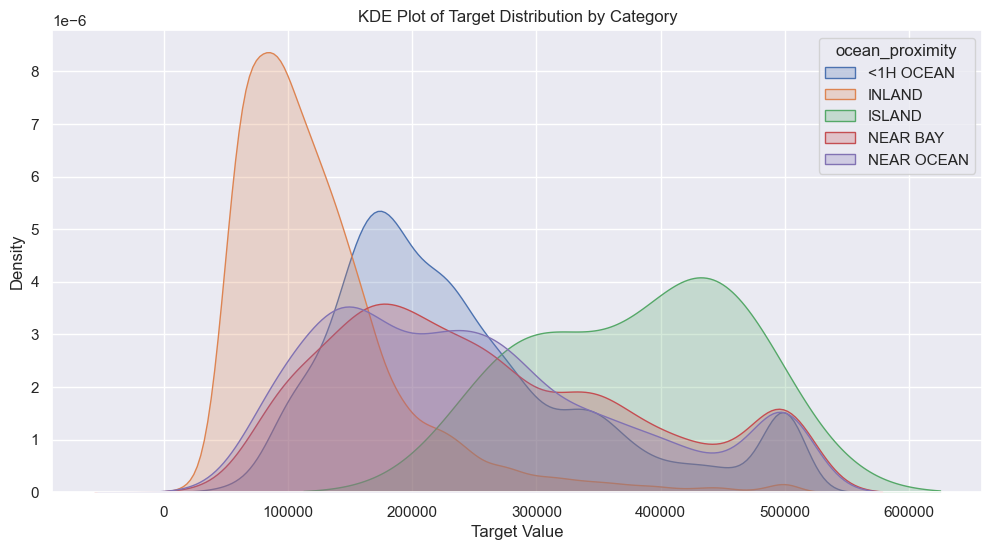

In [11]:
cat_feature_analisys(data["ocean_proximity"], data["median_house_value"])

# Feature Engineering

In [12]:
from lib.feature_engineering import (
    oversample_minority_categories
)

In [13]:
data_over = oversample_minority_categories(
        data, 
        "ocean_proximity", 
        random_state=42
)

Original proportions:
<1H OCEAN     0.442636
INLAND        0.317393
NEAR OCEAN    0.128779
NEAR BAY      0.110950
ISLAND        0.000242
Name: ocean_proximity, dtype: float64

Target counts:
<1H OCEAN     9136
INLAND        6551
NEAR OCEAN    2658
NEAR BAY      2290
ISLAND        2290
Name: ocean_proximity, dtype: int64

New proportions after oversampling:
<1H OCEAN     0.398517
INLAND        0.285758
NEAR OCEAN    0.115943
NEAR BAY      0.099891
ISLAND        0.099891
Name: ocean_proximity, dtype: float64
